## K-NN Regression Model: PCOS

### K-NN Algorithm gets the k-nearest results from regression, which are averaged to get the predicted value. It is a non-linear method for regression

## Imports

In [3]:
# Install Libraries

# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor

# Performance
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

## Dataset

In [4]:
# Import data 
df = pd.read_csv('/Users/taniarizwan/Documents/University/Third Year 2022/Bmen 415/Project/PCOS_data_without_infertility.csv')

# Drop ID columns. Remove L&R follicle numbers since we are predicting Ave. This will bias data. Remove NaN column
dataset= df.drop(['Sl. No', 'Patient File No.', 'Follicle No. (L)', 'Follicle No. (R)', 'Unnamed: 45'], axis=1) 
x=dataset.loc[:,dataset.columns!="Follicle No. (Ave)"]
y = dataset['Follicle No. (Ave)'] 

# Remove null value in X 
x[x.isnull().any(axis=1)] 
X = x.dropna(axis='columns')

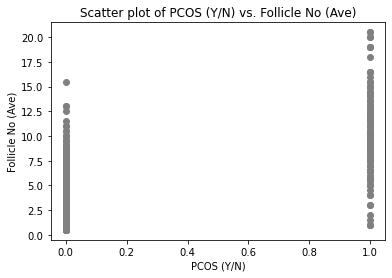

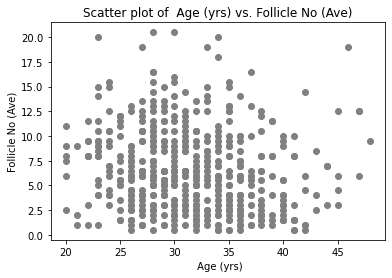

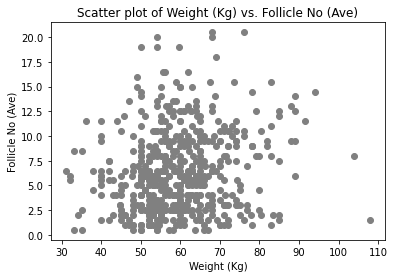

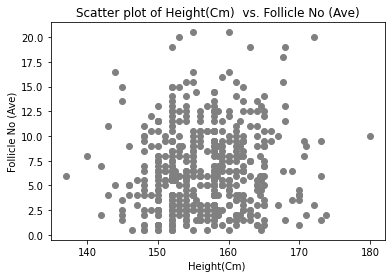

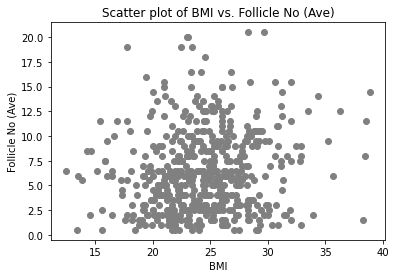

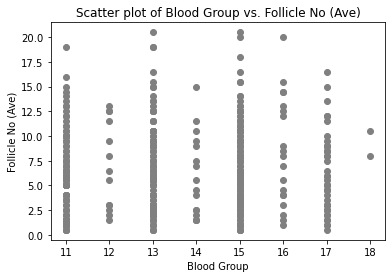

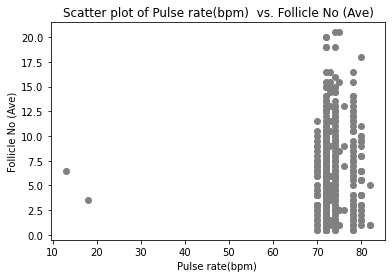

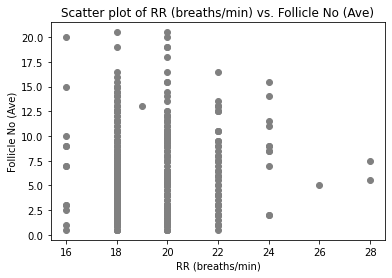

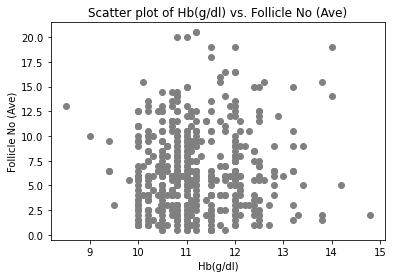

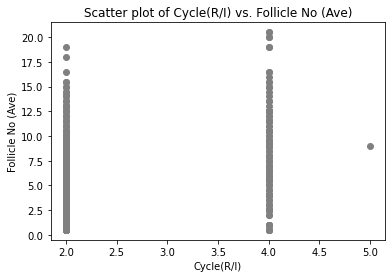

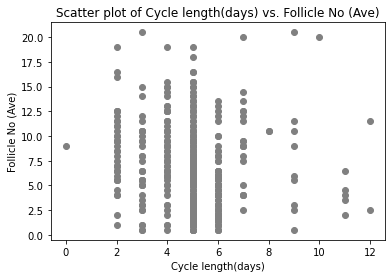

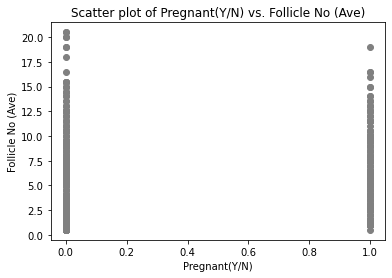

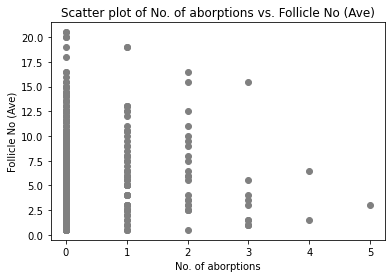

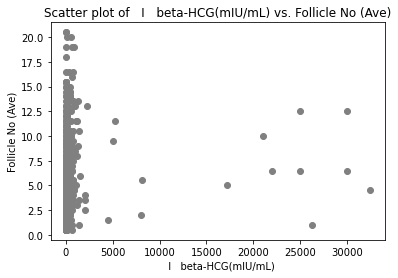

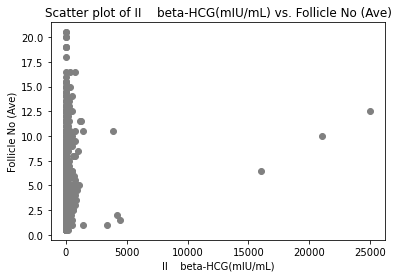

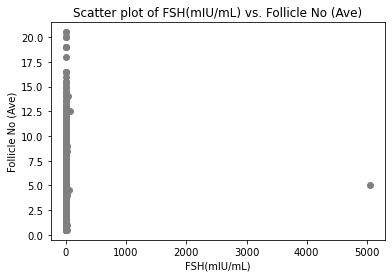

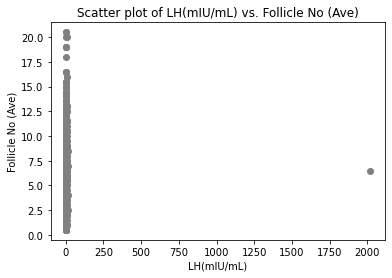

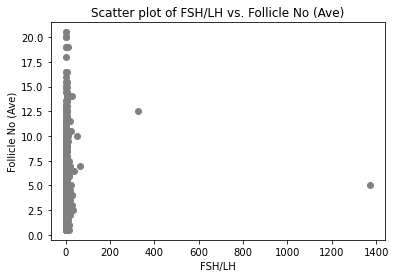

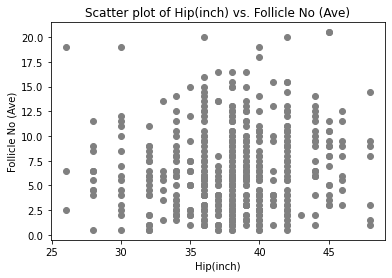

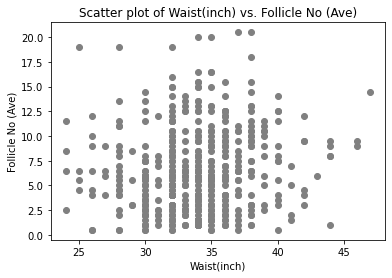

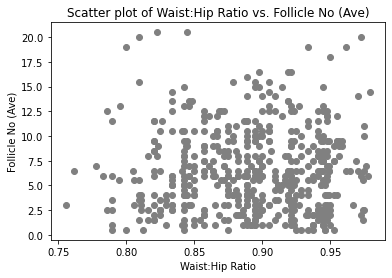

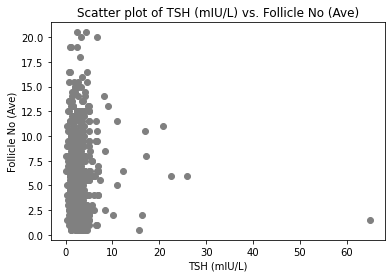

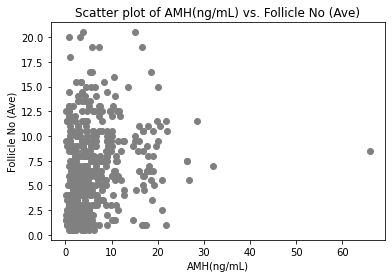

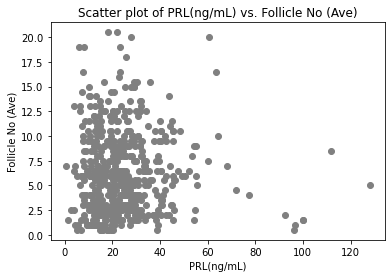

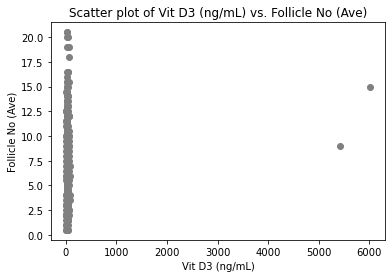

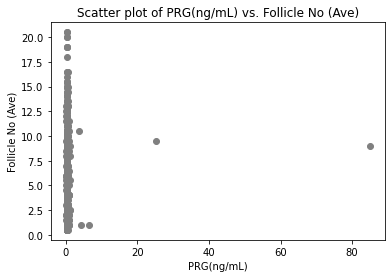

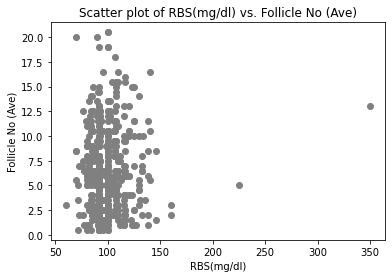

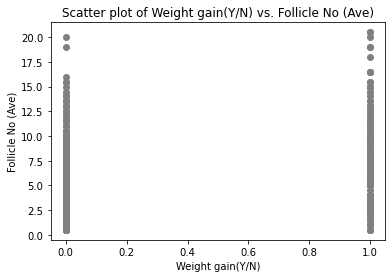

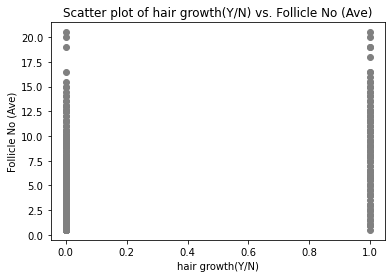

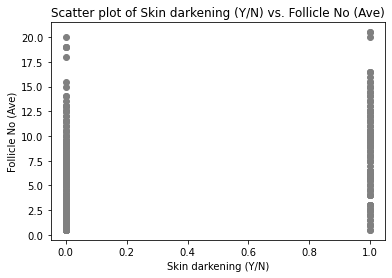

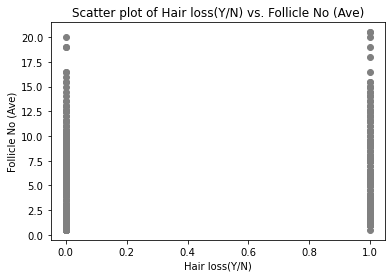

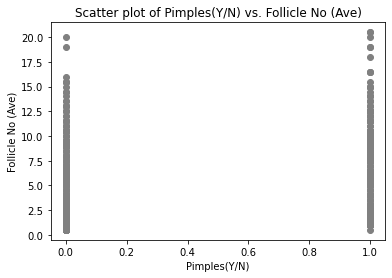

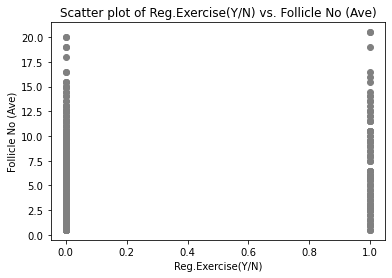

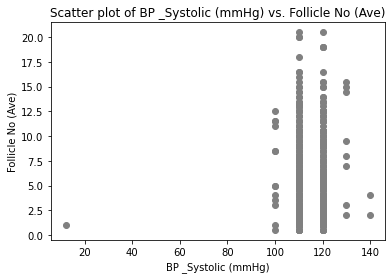

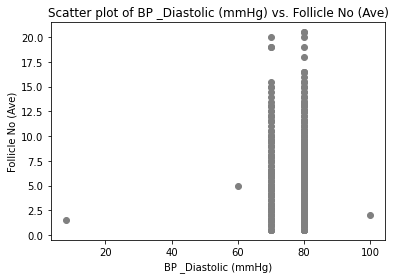

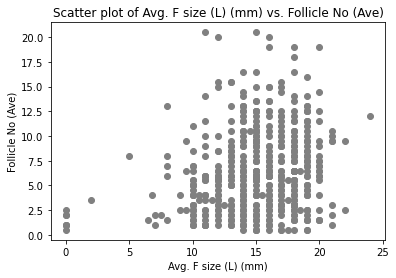

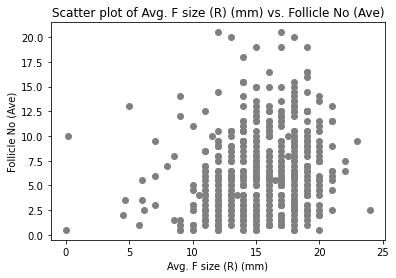

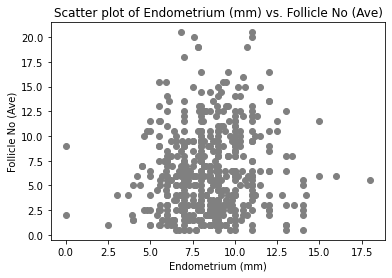

In [11]:
# Data Visualization
for feature in X.columns:
    plt.scatter(X[feature], y, color='grey')
    plt.xlabel(feature)
    plt.ylabel('Follicle No (Ave)')
    plt.title(f'Scatter plot of {feature} vs. Follicle No (Ave)')
    plt.show()

In [28]:
dataset.isna().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [13]:
x[x.isnull().any(axis=1)]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
156,0,27,53.2,158.0,21.310687,13,72,22,10.5,4,...,1,1,0,NaN,1,120,70,11.0,13.0,11.0
457,1,36,66.0,162.0,25.148605,15,72,20,11.0,4,...,0,0,0,0.0,0,120,80,19.0,19.0,8.0


## Data Exploration

<Axes: >

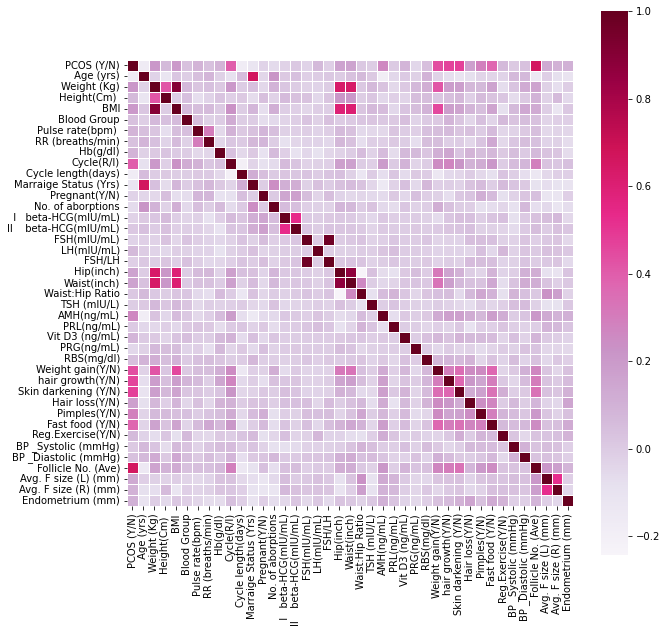

In [10]:
corr_matrix = dataset.corr()
f, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette("PuRd", as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, square=True, linewidths=0.5)

# cbar_kws={"shrink": 0.5} , vmax=0.5,

## Train Test Split

In [14]:
# Use X and y
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=142)

In [15]:
print(f'Train: {X_train.shape, y_train.shape}  \nTest: {X_test.shape, y_test.shape}')

Train: ((378, 38), (378,))  
Test: ((162, 38), (162,))


## K-NN Regression

In [16]:
# Fit the model
knn_model = KNeighborsRegressor(n_neighbors=47).fit(X_train, y_train) # increasing neighbours increases score
# Score
score_knn = knn_model.score(X_test, y_test)
score_knn

0.10421905047130309

In [17]:
# Predictions
train_preds = knn_model.predict(X_train)
test_preds = knn_model.predict(X_test)

# Performance
performance = pd.DataFrame({'True Value':y_test, 'Prediction':test_preds, 'Error':(y_test-test_preds)})
performance


,True Value,Prediction,Error
507,1.0,6.021277,-5.021277
208,6.0,5.946809,0.053191
418,3.0,5.138298,-2.138298
404,2.5,6.329787,-3.829787
416,3.0,5.723404,-2.723404
...,...,...,...
444,7.5,6.914894,0.585106
163,2.5,5.734043,-3.234043
437,10.0,5.914894,4.085106
130,6.0,5.946809,0.053191


In [18]:
# Performance: training (RMSE)
mse_train = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_train)
print(rmse_train)

3.955724867445157


In [19]:
# Performance: training (R2)
training_r2 = r2_score(y_train, train_preds)
print(training_r2)

0.0616928640331903


In [20]:
# Performance: testing (RMSE)
mse_test = mean_squared_error(y_test, test_preds)
rmse_test = sqrt(mse_test)
print(rmse_test)

3.9349073112989155


In [21]:
# Performance: testing (R2)
testing_r2 = r2_score(y_test, test_preds)
print(testing_r2)

0.10421905047130309


## Model Visualization

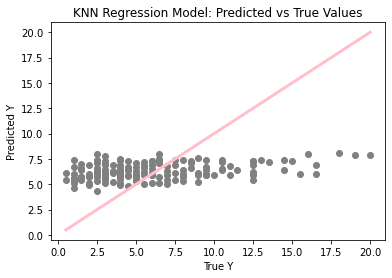

In [23]:
plt.scatter(y_test, test_preds, color='gray')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='pink', lw=3)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.title('KNN Regression Model: Predicted vs True Values')
plt.show()

<Axes: xlabel='y_test', ylabel='test_preds'>

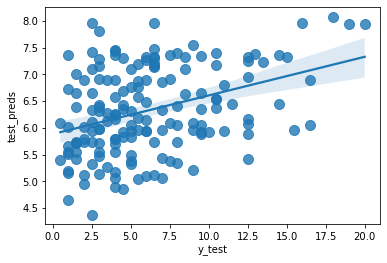

In [38]:
# Another Visualization
KNN_df = pd.DataFrame({'y_test': y_test, 'test_preds': test_preds})

# plot the data using sns.regplot()
sns.regplot(data=KNN_df, x='y_test', y='test_preds', fit_reg=True, scatter_kws={"s":100})